Transformar


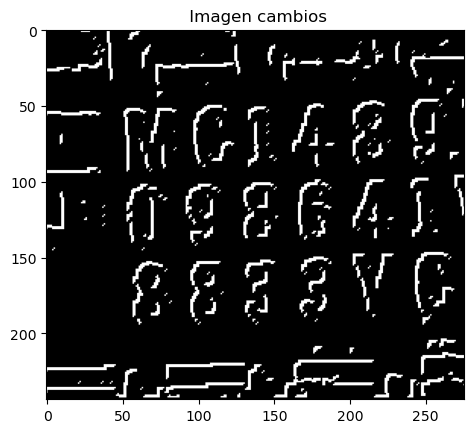

In [2]:

from tkinter import *
from tkinter import filedialog
from tkinter import ttk
from PIL import Image
from PIL import ImageTk
import imutils
import numpy as np
import imageio
import imageio.v2 as imageio
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def listaTriaPascal(nro):
    lista = [] #an empty list
    for n in range(nro):
        lista.append([])
        lista[n].append(1)
        for m in range(1, n):
            lista[n].append(lista[n - 1][m - 1] + lista[n - 1][m])
        if(nro != 0):
            lista[n].append(1)
    return lista

def funcionKernel(vector):
    #Kernel Ejercicio para Filtro Bartellet
    matrizAux=np.zeros([len(vector),len(vector)])
    matrizAux
    h,w=matrizAux.shape
    for i in range(h):
        for j in range(w):
            matrizAux[i,j]=vector[i] * vector[j]
    return matrizAux
        
def calculo_convolution(image1, kernel=np.ones((1,1))):
    convolved = np.zeros((np.array(image1.shape)-np.array(kernel.shape)+1))
    for x in range(convolved.shape[0]):
        for y in range(convolved.shape[1]):
            convolved[x,y] = (image1[x:x+kernel.shape[0],y:y+kernel.shape[1]]*kernel).sum()
    return convolved

def fcionLaplaciano(mR,filtro):
    matrizv4 = np.array([[0,-1, 0],[-1, 4,-1],[0,-1, 0]])
    matrizv8 = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]])
    if filtro == 'fl':
        mAux=calculo_convolution(mR,matrizv4)
    elif filtro =='f2':
        mAux=calculo_convolution(mR,matrizv8)
    else:
        mAux=calculo_convolution(mR,matrizv8)
        mAux = np.clip(mAux,0.,255.)
        h,w = mR.shape
        cambioDim=np.ones([h,w])
        cambioDim[1:-1,1:-1] = cambioDim[1:-1,1:-1]*mAux[:,:] 
        cambioDim2= image1 + 0.2 * cambioDim
        mAux=cambioDim2
        texto.set("Filtro Mejora:  Laplaciano v8 x 0.2")
    mAux=np.clip(mAux,0,255)
    return mAux
def fcionGausiano(matriz, kernel):
    kernel /= np.sum(kernel)
    mAux=calculo_convolution(matriz,kernel)
    return mAux

def fcionBartlett(matriz, kernel):
    kernel /= np.sum(kernel)
    mAux=calculo_convolution(matriz,kernel)
    return mAux

def fcionPlano(matriz, valor):
    
    #print('Ingrese')
    #print(matriz)
    kernel=np.ones([valor,valor],dtype=np.float64)
    kernel /= np.sum(kernel)
    #print(kernel)
    mAux=calculo_convolution(matriz,kernel)
    #print(mAux)
    #print('Llegue al fin')
    return mAux

def fcionsobel(matriz, direccion):
    kernel = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    kernelDirrec=np.array([[-2, -1, 0],[-1, 0, 1],[0, 1, 2]])
    if direccion == 'E':
        #print(kernel)
        mAux = calculo_convolution(matriz,kernel)
    elif direccion == 'O':
        #print(kernel)
        mAux = calculo_convolution(matriz,kernel*(-1))
    elif direccion =='S':
        mAux = calculo_convolution(matriz,np.rot90(kernel))
    elif direccion =='N':
        mAux = calculo_convolution(matriz,np.rot90(kernel*(-1)))
    elif direccion == 'NE':
        mAux = calculo_convolution(matriz,kernelDirrec)
    elif direccion == 'SE':
        mAux = calculo_convolution(matriz,np.rot90(kernelDirrec))
    elif direccion == 'SO':
        mAux = calculo_convolution(matriz,(kernelDirrec*(-1)))
    else:
        #'NO'
        mAux = calculo_convolution(matriz,(np.rot90(kernelDirrec*(-1))))
    return mAux

def guardar_imagen():
    global imageOutput
    aux = combo.get()      
    im = Image.fromarray((imageOutput * 255).astype(np.uint8))
    im.save(f"{aux}_imagenOuput.png")
    
##Funcion  de RGB A YIQ
def RGB_to_YIQ(im):
    h,w,c=im.shape # obtenemos el tamaño de la imagen original
    mYIQ = np.zeros((h,w,3)) # creamos una matriz donde generar la imagen
    mYIQ[:,:,0] = 0.299*im[:,:,0] + 0.587*im[:,:,1] + 0.114*im[:,:,2]
    mYIQ[:,:,0] = np.clip(mYIQ[:,:,0], 0, 1)
    mYIQ[:,:,1] = 0.595716*im[:,:,0] + -0.274453*im[:,:,1] + -0.321263*im[:,:,2]
    mYIQ[:,:,1] = np.clip(mYIQ[:,:,1], -0.5957, 0.5957)
    mYIQ[:,:,2] = 0.211456*im[:,:,0] + -0.522591*im[:,:,1] + 0.311135*im[:,:,2]
    mYIQ[:,:,2] = np.clip(mYIQ[:,:,2], -0.5226, 0.5226)
    return mYIQ 

##Funcion  de YIQ A RGB
def YIQ_to_RGB(valoresMatriz):
    im = valoresMatriz
    h,w,c=im.shape # obtenemos el tamaño de la imagen original
    mRGB = np.zeros((h,w,3)) # creamos una matriz donde generar la imagen
    mRGB[:,:,0] = 1*im[:,:,0] + 0.9663*im[:,:,1] + 0.6210*im[:,:,2]
    mRGB[:,:,1] = 1*im[:,:,0] + -0.2721*im[:,:,1] + -0.6474*im[:,:,2]
    mRGB[:,:,2] = 1*im[:,:,0] + -1.1070*im[:,:,1] + 1.7046*im[:,:,2]
    return mRGB

def calculo():
    global image1, imageOutput
    #TRIANGULO DE PASCAL HASTA FILA 8
    vector = listaTriaPascal(7)
    mR=image1
    
    ###SELECCION DE OPERACIONES##
    if (combo.get() == 'Plano 3x3' or combo.get() == 'Plano 5x5' or combo.get() == 'Plano 7x7'):
        if (combo.get() == 'Plano 3x3'):
            #PLANO - KERNEL 3X3
            mAux=fcionPlano(mR,3)
            #print(mAux1)
            #kernel=np.ones([3,3],dtype=np.float64)
            #kernel /= np.sum(kernel)
            #print(kernel)
            #mAux=calculo_convolution(mR,kernel)
        elif (combo.get() == 'Plano 5x5'):
            #PLANO - KERNEL 5X5
            mAux = fcionPlano(mR,5)
        else:
            #PLANO - KERNEL 7X7
            mAux = fcionPlano(mR,7)
        texto.set(" ")
    
    if (combo.get() == 'Bartlett 3x3' or combo.get() == 'Bartlett 5x5' or combo.get() == 'Bartlett 7x7'):
        if (combo.get() == 'Bartlett 3x3'):
            #BARTLETT - KERNEL 3X3 - [1,2,1]
            kernel = funcionKernel([1, 2, 1])
            mAux = fcionBartlett(mR,kernel)
        elif (combo.get() == 'Bartlett 5x5'):
            #BARTLETT - KERNEL 5X5 - [1,2,3,2,1]
            kernel = funcionKernel([1, 2, 3, 2, 1])
            mAux = fcionBartlett(mR,kernel)
        else:
            #BARTLETT - KERNEL 7X7 - [1,2,3,4,3,2,1]
            kernel = funcionKernel([1, 2, 3, 4, 3, 2, 1])
            mAux = fcionBartlett(mR,kernel)
        texto.set(" ")
            
    if (combo.get() == 'Gaussiano 5x5' or combo.get() == 'Gaussiano 7x7'):
        if (combo.get() == 'Gaussiano 5x5'):
            #GAUSSIANO - KERNEL 5X5
            print(vector[4])
            kernel = funcionKernel(vector[4])
            mAux=fcionGausiano(mR,kernel)
        else:
            #GAUSSIANO - KERNEL 7X7
            kernel = funcionKernel(vector[6])
            mAux=fcionGausiano(mR,kernel)
        texto.set(" ")
            
    if (combo.get() == 'Laplaciano v4' or combo.get() == 'Laplaciano v8' or combo.get()=='Filtro Mejora'):
        if (combo.get() == 'Laplaciano v4'):
            #LAPLACIANO - KERNEL 3X3
            mAux=fcionLaplaciano(mR,'fl1')
            texto.set(" ")
        elif (combo.get() == 'Laplaciano v8'):
            #LAPLACIANO - KERNEL 3X3
            mAux=fcionLaplaciano(mR,'fl2')
            texto.set(" ")
        else:
            #FILTRO MEJORA LAPLACIANO V8 - 0.2
            mAux=fcionLaplaciano(mR,'fm')
    if (combo.get() == 'Sobel N' or combo.get() == 'Sobel O' or combo.get() == 'Sobel S' or combo.get() == 'Sobel E' or combo.get() == 'Sobel NO' or combo.get() == 'Sobel SO' or combo.get() == 'Sobel SE' or combo.get() == 'Sobel NE'):
        if (combo.get() == 'Sobel E'):
            mAux = fcionsobel(mR,'E')
            #print("funcionPlano(kernel5)")
        elif (combo.get() == 'Sobel O'):
            mAux=fcionsobel(mR,'O')
            #print("funcionPlano(kernel7)")
        elif (combo.get() == 'Sobel N'):
            mAux=fcionsobel(mR,'N')
        elif (combo.get() == 'Sobel S'):
            mAux=fcionsobel(mR,'S')
        elif (combo.get() == 'Sobel NE'):
            mAux=fcionsobel(mR,'NE')
        elif (combo.get() == 'Sobel SE'):
            mAux=fcionsobel(mR,'SE')
        elif (combo.get() == 'Sobel SO'):
            mAux=fcionsobel(mR,'SO')
        else:
            mAux=fcionsobel(mR,'NO')
        texto.set(" ")
            
    if (combo.get() == 'Filtro Pasabanda'):
        kernel5X5 = funcionKernel(vector[4])
        mAuxiliar = np.zeros([len(vector[4]), len(vector[4])])
        kernel3X3 = funcionKernel(vector[2])
        for i in range(mAuxiliar.shape[0]):
            for j in range(mAuxiliar.shape[1]):
                if (i>=1 and j>=1 and i<=3 and j<=3):
                    mAuxiliar[i,j] = kernel3X3[i-1,j-1]
        mNew = kernel5X5-mAuxiliar
        mNew /= np.sum(mNew)
        
        mAux=fcionGausiano(mR,mNew)
        texto.set(" ")
        #print(mAux)
    
    mAux1 = mAux

    plt.figure(0)
    plt.title(" Imagen cambios")
    #plt.imshow(mAux1,'gray')
    array = np.array(mAux1,dtype=np.float64)
    #print(mR.shape)
    #print(mR.dtype)
    array = np.clip(array,0,1)
    plt.imshow(array,'gray')
    imageOutput = array
    image = imutils.resize(array, height=480)
    imageToShow = imutils.resize(image, width=200)
    #plt.imshow(imageToShow.astype('float64'))
    #image_file = imageToShow.convert('RGB')
    #im = Image.fromarray(image_file)
    #print(imageToShow.min(), imageToShow.max())
    im = Image.fromarray((imageToShow*255).astype(np.uint8))#
    #im = Image.fromarray(imageToShow)
    img = ImageTk.PhotoImage(image = im)
    lblOuputIm.configure(image=img)
    lblOuputIm.image = img
    pass   

def elegir_imagen():
    #Espercificar los tipos  de archivos, para elegir solo las imagenes
    path_image = filedialog.askopenfilename(filetypes = [
        ("image",".jpg"),
        ("image",".png"),
        ("image",".bmp")])
    if len(path_image)>0:
        global image1
        
        #leer la imagen de entrada
        image1 = imageio.imread(path_image)
        image = image1
        #image1 =image1/255.0
        
            
        #Verifico si es imagen color o grises
        if (len(image1.shape) == 3):
            print('Transformar')
            image1=image1/255
            mR=RGB_to_YIQ(image1) # SIST YIQ
            image1 = mR[:,:,0]
        else:
            print('No transformar')
            image1 =image1/255.0
        
        image = imutils.resize(image, height=480)
        
        #Para visualizar la imagen de entrada en la GUI
        imageToShow = imutils.resize(image, width=200)
        im = Image.fromarray(imageToShow)
        img = ImageTk.PhotoImage(image = im)
        
        lblInputIm1.configure(image=img)
        lblInputIm1.image = img
        
        #label imagen de entrada
        lblInfo1 = Label(root, text=f"Imagen ")
        lblInfo1.grid(column=0, row=1, padx=15, pady=15)


image1 = None
imageOutput = None

#Creamos la ventana principal
root = Tk()

texto = StringVar()
texto.set(" ")

root.geometry('680x500')

#Label donde se presentarala imagen de entrada
lblInputIm1 = Label(root)
lblInputIm1.grid(column=0,row=2, padx=15, pady=15)

#Label donde se presentará la imagen de salida
lblOuputIm = Label(root)
lblOuputIm.grid(column=2,row=2, padx=15, pady=15)

#LabelDeSalida
lblOutputInfo = Label(root, text="Resultado", width =25)
lblOutputInfo.grid(column=2, row=1)

#Creamos los ComboBox y la ubicacion que estos ocuparan
combo = ttk.Combobox(root)
combo.grid(column=1,row=2)

combo['values'] = ('Plano 3x3','Plano 5x5','Plano 7x7','Bartlett 3x3', 'Bartlett 5x5', 'Bartlett 7x7', 
                   'Gaussiano 5x5','Gaussiano 7x7', 'Laplaciano v4', 'Laplaciano v8', 'Filtro Mejora', 'Sobel N', 'Sobel O', 
                   'Sobel S', 'Sobel E', 'Sobel NO', 'Sobel SO', 'Sobel SE', 'Sobel NE','Filtro Pasabanda' )
combo.current(0)

#Creamos el boton para elegir la imagen de entrada 
btnIm1 = Button(root, text="ELegir imagen", width=25, command=elegir_imagen)
btnIm1.grid(column=0, row=0, padx=5, pady=5)

btnOuput = Button(root, text="Guardar imagen", width=25, command=guardar_imagen)
btnOuput.grid(column=2, row=0, padx=5, pady=5)

boton = Button(root, command=calculo, text="Filtrar",  width= 25)
boton.grid(column=1, row=9, padx=5, pady=5)

btnSalir = Button(root, text="Salir", bg = '#ebaec6', width= 25, command=root.destroy)
btnSalir.grid(column=1, row=10, padx=5, pady=5)

etiqueta = Label(root, textvariable=texto)
etiqueta.grid(column=1, row=11, padx=5, pady=5)

root.mainloop()